# Lab 01 Tasks 

## Task 1

The Python dictionary below stores details of Twitter follower relations for a set of 6 Twitter users. Each key is a Twitter username **X** and the corresponding list indicates the names of other users who follow the user **X**.

Based on this data, construct an appropriate network using NetworkX, and identify: 

- The total number of nodes and edges in the network.
- All edges in the network that are *reciprocated*.

In [6]:
twitter_data = {'@alice88': ['@amara2000', '@freya_ie', '@sydney'],
    '@amara2000': ['@freya_ie', '@alice88', '@dobrien', '@marcjones'],
    '@dobrien': ['@marcjones', '@alice88'],
    '@freya_ie': ['@sydney'],
    '@marcjones': ['@freya_ie', '@alice88', '@amara2000', '@dobrien'],
    '@sydney': ['@alice88']}

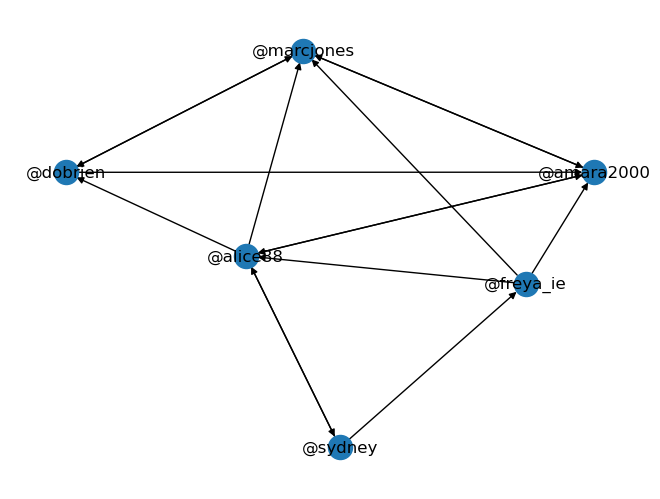

In [7]:
import networkx as nx
g = nx.DiGraph() #Create a directed graph as this is twitter followers data
#For key in dictionary twitter_data, add new node of that key and then add an edge for each node that key has. 
for handle1 in twitter_data: 
    g.add_node(handle1)
    for handle2 in twitter_data[handle1]:
        g.add_edge(handle2, handle1)
nx.draw(g, with_labels=True) #View the graph

In [12]:
#Number of Nodes and Edges:
print("There are:", g.number_of_nodes(), "nodes and:", g.number_of_edges(), "edges in the network.")

There are: 6 nodes and: 15 edges in the network.


In [14]:
#Check Reciprocity in Edges:
import itertools
for pair in itertools.combinations(twitter_data.keys(), r=2):
    if g.has_edge(pair[0], pair[1]) and g.has_edge(pair[1], pair[0]):
        print(pair)

('@alice88', '@amara2000')
('@alice88', '@sydney')
('@amara2000', '@marcjones')
('@dobrien', '@marcjones')


## Task 2

The Python dictionary below records meeting attendances for team members of a research group across an 8 week period. 

Based on this data, construct an appropriate weighted *co-presence* network, and identify: 

- The total number of nodes and edges in the network.
- The edge(s) with the highest weight in the network.

In [16]:
meeting_data = {'week1': ['bob', 'alice', 'oliver', 'justin'],
    'week2': ['maria', 'tanya', 'justin', 'bob', 'oliver'],
    'week3': ['lara', 'tanya', 'maria', 'justin'],
    'week4': ['justin', 'bob', 'tanya'],
    'week5': ['alice', 'tanya', 'lara', 'bob', 'justin'],
    'week6': ['oliver', 'maria', 'lara'],
    'week7': ['tanya', 'justin', 'bob'],
    'week8': ['maria', 'tanya', 'bob']}

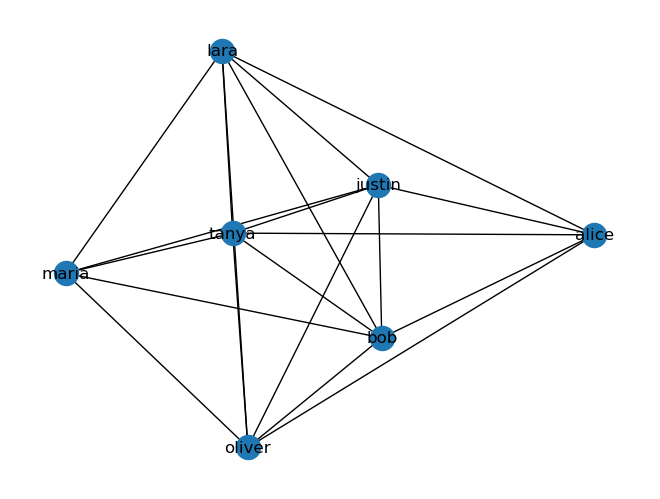

In [18]:
g1 = nx.Graph()
for week in meeting_data:
    for pair in itertools.combinations(meeting_data[week], r=2):
        if g1.has_edge(pair[0], pair[1]):
            g1[pair[0]][pair[1]]["weight"] +=1
        else:
            g1.add_edge(pair[0], pair[1], weight=1)
nx.draw(g1, with_labels=True)

In [19]:
#Number of Nodes and Edges:
print("There are:", g1.number_of_nodes(), "nodes and:", g1.number_of_edges(), "edges in the network.")

There are: 7 nodes and: 20 edges in the network.


In [20]:
from collections import Counter

weights = Counter()
for e in g1.edges(data=True):
    key = "%s, %s" % (e[0], e[1])
    weights[key] = e[2]["weight"]
weights.most_common()

[('bob, justin', 5),
 ('bob, tanya', 5),
 ('justin, tanya', 5),
 ('maria, tanya', 3),
 ('bob, alice', 2),
 ('bob, oliver', 2),
 ('bob, maria', 2),
 ('alice, justin', 2),
 ('oliver, justin', 2),
 ('oliver, maria', 2),
 ('justin, maria', 2),
 ('justin, lara', 2),
 ('maria, lara', 2),
 ('tanya, lara', 2),
 ('bob, lara', 1),
 ('alice, oliver', 1),
 ('alice, tanya', 1),
 ('alice, lara', 1),
 ('oliver, tanya', 1),
 ('oliver, lara', 1)]

## Task 3

Based on the weighted co-presence network constructed in Task 2, perform the following:

- Create a new unweighted network by apply thresholding to the edge weights, for a threshold value *t=3*. How many nodes and edges are in the resulting network?
- Identify any *isolated* nodes which now exist in the new unweighted network.

In [22]:
#Create New Graph
g2 = nx.Graph()
#Add nodes from original network
for node in g1.nodes():
    g2.add_node(node)
#Add edges that are over a weight of 3
for edge in g1.edges(data=True):
    if edge[2]["weight"] >= 3:
        g2.add_edge( edge[0], edge[1] )
        

In [24]:
#Number of Nodes and Edges:
print("There are:", g2.number_of_nodes(), "nodes and:", g2.number_of_edges(), "edges in the network.")

There are: 7 nodes and: 4 edges in the network.


In [25]:
#Identify any isolated nodes in this new network
list(nx.isolates(g2))

['alice', 'oliver', 'lara']